In [1]:
pwd

'/content'

In [2]:
cd drive/MyDrive/Kaggle/

/content/drive/.shortcut-targets-by-id/108/Kaggle


In [5]:
!pip install opencv-contrib-python==4.4.0.44

     |████████████████████████████████| 55.7MB 80kB/s 
  Found existing installation: opencv-contrib-python 4.1.2.30
    Uninstalling opencv-contrib-python-4.1.2.30:
      Successfully uninstalled opencv-contrib-python-4.1.2.30


In [3]:
# import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
import pickle
import sklearn
import os


from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from sklearn.model_selection import train_test_split


In [4]:
# required cv version for SIFT
cv2.__version__

'4.4.0'

# load training images

In [6]:
def load_image(train_data, data_dir):
  data = []
  labels = []
  for row in train_data.iterrows():
    if row[0] % 1000 == 0:
      print('Load image', row[0])
    image_path = row[1]['Path']
    classId = row[1]['ClassId']
    
    image = cv.imread(os.path.join(data_dir, image_path))
    
    data.append(image)
    labels.append(classId)
  return data, labels

In [7]:
if os.path.isfile("Image_n_Labels/trainImages.npy") &  os.path.isfile("Image_n_Labels/trainLabels.npy") :
    print("case1")
    X = np.load("Image_n_Labels/trainImages.npy", allow_pickle=True)
    y = np.load("Image_n_Labels/trainLabels.npy", allow_pickle=True)
    print("[INFO] Training images and labels are loaded in variables ==> X,y")
    print("[INFO] Number of training Images {} \nNumber of Labels {}".format(len(X), len(y)))
else:
    # training images and labels
    trainImages, trainLabels = load_image(train, data_dir)
    np.save("Image_n_Labels/trainImages.npy",trainImages)
    np.save("Image_n_Labels/trainLabels.npy",trainLabels)
    print("[INFO] training images and labels are read from the dataset directory")
    print("[INFO] training images saved to Image_n_Labels/trainingImages.npy for further use")
    print("[INFO] training labels saved to Image_n_Labels/trainingLabels.npy for further use")

case1
[INFO] Training images and labels are loaded in variables ==> X,y
[INFO] Number of training Images 39209 
Number of Labels 39209


# load test images

In [8]:
if os.path.isfile("Image_n_Labels/testImages.npy") & os.path.isfile("Image_n_Labels/testLabels.npy") :
    print("case1")
    X_test_new = np.load("Image_n_Labels/testImages.npy", allow_pickle=True)
    Y_test_new = np.load("Image_n_Labels/testLabels.npy", allow_pickle=True)
    print("[INFO] Training images and labels are loaded in variables ==> X_test_new,y_test_new")
    print("[INFO] Number of training Images {} \nNumber of Labels {}".format(len(X_test_new), len(Y_test_new)))
else:    
    # training images and labels
    testImages, testLabels = load_image(test, data_dir)
    np.save("Image_n_Labels/testImages.npy", testImages)
    np.save("Image_n_Labels/testLabels.npy", testLabels)
    print("[INFO] testing images and labels are read from the dataset directory")
    print("[INFO] testing images saved to Image_n_Labels/testImages.npy for further use")
    print("[INFO] testing labels saved to Image_n_Labels/testLabels.npy for further use")

case1
[INFO] Training images and labels are loaded in variables ==> X_test_new,y_test_new
[INFO] Number of training Images 12630 
Number of Labels 12630


# extract sift & bow features

In [15]:
def extract_sift_features(X):
    image_descriptors = []
    feature_extractor = cv2.SIFT_create()

    for i in range(len(X)):
        kp, des = feature_extractor.detectAndCompute(X[i], None)

        # save image for visualisation
        img=cv2.drawKeypoints(X[i],kp,outImage = None ,flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
        SAVED_SIFT.append(img)
        # cv2.imwrite(str(i) +".jpg" ,img)
        #### YOUR CODE HERE ####
        image_descriptors.append(des)
        #### END YOUR CODE #####

    return image_descriptors

In [11]:
def kmeans_bow(all_descriptors, num_clusters):
    bow_dict = []

    #### YOUR CODE HERE ####

    kmeans = KMeans(n_clusters=num_clusters).fit(all_descriptors)
    bow_dict = kmeans.cluster_centers_

    #### END YOUR CODE #####

    return bow_dict

In [12]:
def create_features_bow(image_descriptors, BoW, num_clusters):
    X_features = []

    for i in range(len(image_descriptors)):
        features = np.array([0] * num_clusters)

        if image_descriptors[i] is not None:
            distance = cdist(image_descriptors[i], BoW)
            #### YOUR CODE HERE ####
            argmin = np.argmin(distance, axis=1)
            
            for j in argmin:
                features[j] += 1
            #### END YOUR CODE #####

        X_features.append(features)


    return X_features

In [13]:
def SiftandBow(random_images):

    image_descriptors = extract_sift_features(random_images)
    print(len(image_descriptors))


    # extract unique descriptors
    all_descriptors = []
    for descriptors in image_descriptors:
        if descriptors is not None:
            for des in descriptors:
                all_descriptors.append(des)
    print('Total number of descriptors: %d' %(len(all_descriptors)))

    # descriptor reduction
    num_clusters = 150
    if not os.path.isfile('bow_dictionary150.pkl'):
        BoW = kmeans_bow(all_descriptors, num_clusters)
        pickle.dump(BoW, open('bow_dictionary150.pkl', 'wb'))
    else:
        BoW = pickle.load(open('bow_dictionary150.pkl', 'rb'))
        
    print("Len of Bow: ",len(BoW))
    print("Type of Bow[0]: ",type(BoW[0]))

    # create BOW feature vector
    X_features = create_features_bow(image_descriptors, BoW, num_clusters)
    print(len(X_features))
    print(X_features[0])
    print(sum(X_features[0]))
    print(image_descriptors[0].shape[0])

    return X_features

In [16]:
features = SiftandBow(X)
np.save("Sift&BowTest/Sift&Bowfeatures_train.npy",features )


39209
Total number of descriptors: 911514
Len of Bow:  150
Type of Bow[0]:  <class 'numpy.ndarray'>
39209
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]
1
1


In [ ]:
test = SiftandBow(X_test_new)
np.save("Sift&BowTest/Sift&Bowfeatures_test.npy",test )


12630
Sample descriptor
Total number of descriptors: 284126
Len of Bow:  150
Type of Bow[0]:  <class 'numpy.ndarray'>
12630
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 2 1 0 0 0 0 1 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]
11
11


In [28]:
# function for plotting images
def plot_sample(x):    
    i = 0
    j = 0
    fig, axs = plt.subplots(5, 5)
    fig.set_size_inches(17, 17)
    plt.subplots_adjust(wspace=0, hspace=0)
    plt.setp(plt.gcf().get_axes(), xticks=[], yticks=[]);

    for z in range(25):
        axs[j,i].imshow(cv2.cvtColor(x[z], cv2.COLOR_BGR2RGB))
        
        if i < 4:
            i += 1
        else:
            i = 0
            j += 1
    plt.show()

In [42]:
def extract_sift_features2(X):
    image = []
    feature_extractor = cv2.SIFT_create()

    for i in range(len(X)):
        kp, des = feature_extractor.detectAndCompute(X[i], None)

        # save image for visualisation
        image.append(cv2.drawKeypoints(X[i],kp,outImage = None ,flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS))

        # cv2.imwrite(str(i) +".jpg" ,img)
        #### YOUR CODE HERE ####
        # image_descriptors.append(des)
        #### END YOUR CODE #####

    return image

In [54]:
output = []
input = []
index = [100,1000,2000,4000,9000]
for i in index:
    input.append(X_test_new[i])
output = extract_sift_features2(input)
input.extend(output)

index = [10000,400,2,906,600]
new_input = []
for i in index:
    new_input.append(X_test_new[i])
output = extract_sift_features2(new_input)
input.extend(new_input)
input.extend(output)

IndexError: ignored

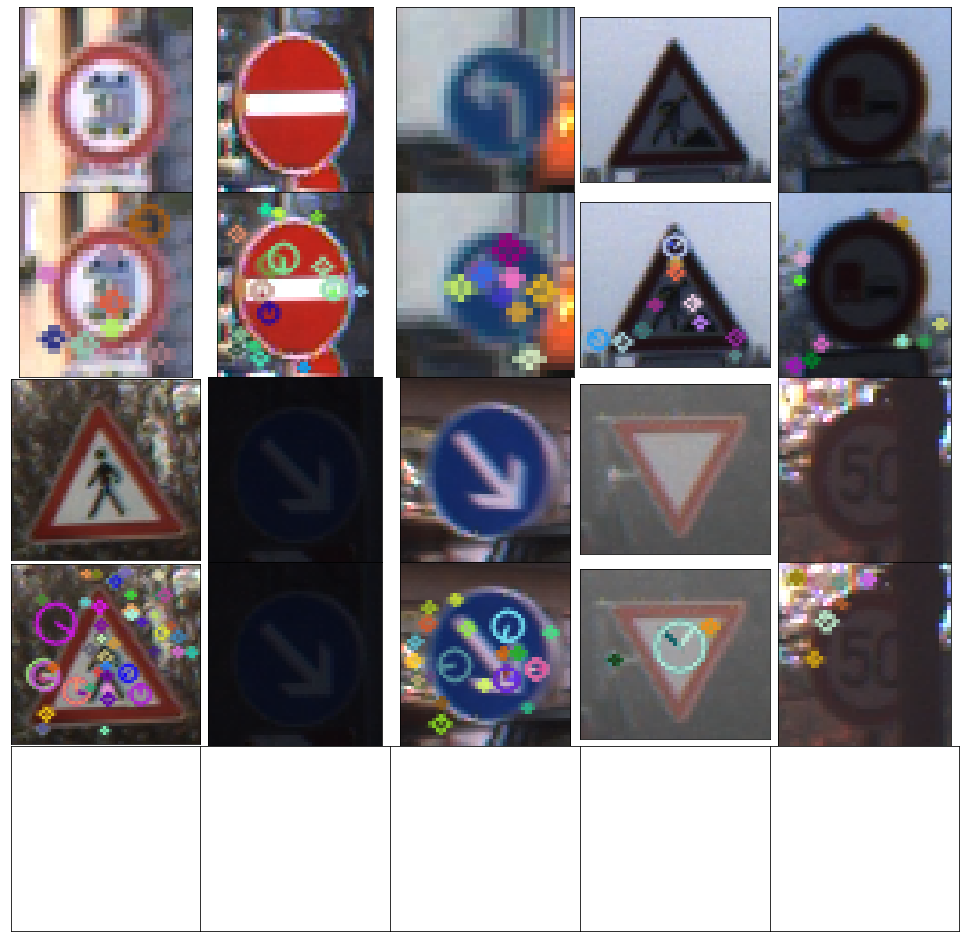

In [55]:
plot_sample(input)